In [45]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [46]:
copper = pd.read_excel('../data/marketdata_copper.xlsx')
zinc = pd.read_excel('../data/marketdata_zinc.xlsx')

In [47]:
print(copper.head())
print(copper.info())
print(zinc.head())
print(zinc.info())

  Commodity   Unit Location  Spot Price(Rs.) Up/Down       Date      Time
0    COPPER  1 KGS    THANE            878.6       - 2025-06-19  17:58:00
1    COPPER  1 KGS    THANE            885.5       + 2025-06-18  17:19:00
2    COPPER  1 KGS    THANE            881.5       - 2025-06-17  17:19:00
3    COPPER  1 KGS    THANE            882.5       + 2025-06-16  17:19:00
4    COPPER  1 KGS    THANE            875.0       - 2025-06-13  17:17:00
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1019 entries, 0 to 1018
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Commodity        1019 non-null   object        
 1   Unit             1019 non-null   object        
 2   Location         1019 non-null   object        
 3   Spot Price(Rs.)  1019 non-null   float64       
 4   Up/Down          1019 non-null   object        
 5   Date             1019 non-null   datetime64[ns]
 6   Time             1019

In [48]:
copper.columns = copper.columns.str.lower()
zinc.columns = zinc.columns.str.lower()

In [49]:
print(copper.isnull().sum())
print(zinc.isnull().sum())

commodity          0
unit               0
location           0
spot price(rs.)    0
up/down            0
date               0
time               0
dtype: int64
commodity          0
unit               0
location           0
spot price(rs.)    0
up/down            0
date               0
time               0
dtype: int64


In [50]:
# Ensure 'date' column is datetime
copper['date'] = pd.to_datetime(copper['date'])

zinc['date'] = pd.to_datetime(zinc['date'])


In [51]:
print(copper['date'].head())
print(zinc['date'].head())
print(copper['date'].dtype)
print(zinc['date'].dtype)

0   2025-06-19
1   2025-06-18
2   2025-06-17
3   2025-06-16
4   2025-06-13
Name: date, dtype: datetime64[ns]
0   2025-06-19
1   2025-06-18
2   2025-06-17
3   2025-06-16
4   2025-06-13
Name: date, dtype: datetime64[ns]
datetime64[ns]
datetime64[ns]


In [52]:
copper = copper.sort_values('date')
zinc = zinc.sort_values('date')

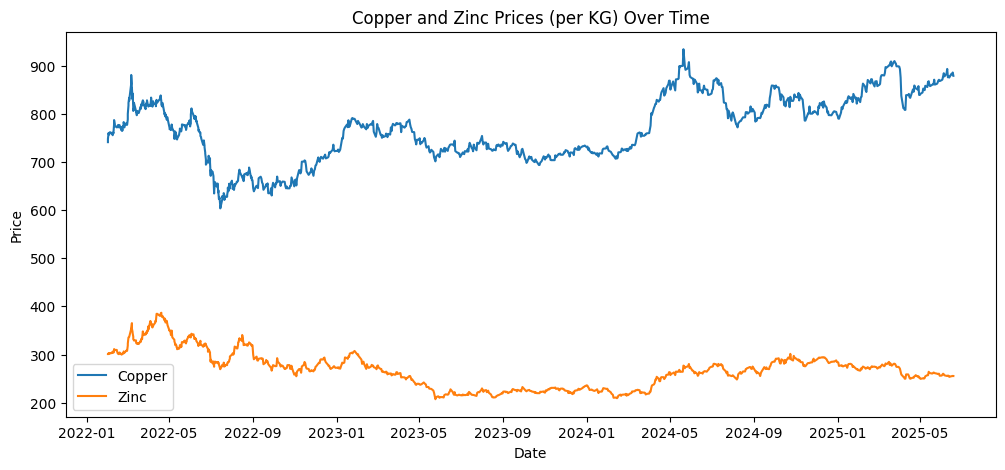

In [53]:
#PLOTTING COPPER AND ZINC PRICES OVER TIME
plt.figure(figsize=(12, 5))
plt.plot(copper['date'], copper['spot price(rs.)'], label='Copper')
plt.plot(zinc['date'], zinc['spot price(rs.)'], label='Zinc')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Copper and Zinc Prices (per KG) Over Time')
plt.legend()
plt.show()

In [54]:
#DESCRIBING
print(copper['spot price(rs.)'].describe())
print(zinc['spot price(rs.)'].describe())

count    1019.000000
mean      766.286801
std        68.547514
min       603.400000
25%       718.525000
50%       769.150000
75%       820.200000
max       933.800000
Name: spot price(rs.), dtype: float64
count    1018.000000
mean      274.911739
std        40.263775
min       207.200000
25%       248.325000
50%       274.150000
75%       300.687500
max       386.700000
Name: spot price(rs.), dtype: float64


In [55]:
print(copper.duplicated(subset=['date']).sum())
print(zinc.duplicated(subset=['date']).sum())

148
147


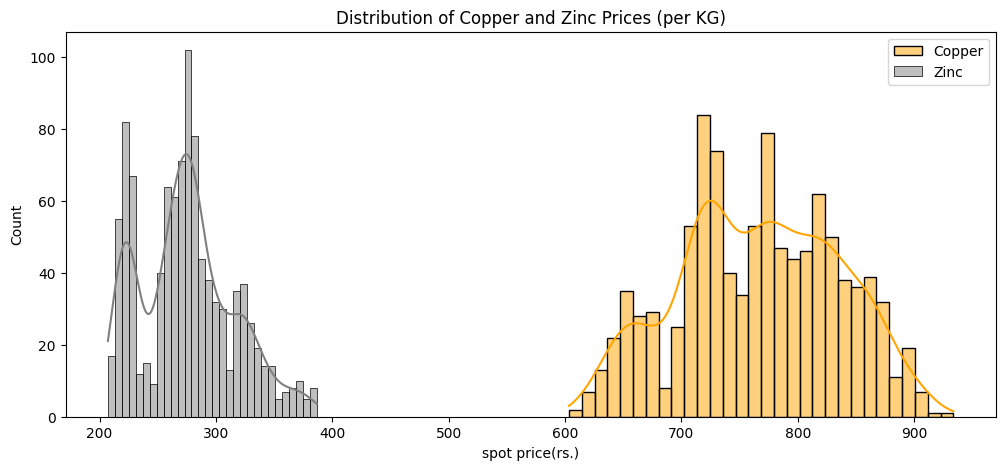

In [56]:
plt.figure(figsize=(12, 5))
sns.histplot(copper['spot price(rs.)'], kde=True, color='orange', label='Copper', bins=30)
sns.histplot(zinc['spot price(rs.)'], kde=True, color='gray', label='Zinc', bins=30)
plt.title('Distribution of Copper and Zinc Prices (per KG)')
plt.legend()
plt.show()

## CALCULATING BRASS INDEX

Method Used: Polynomial Regression

In [57]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

import numpy as np


In [58]:
#merging copper and zinc 
market = pd.merge(copper, zinc, on= 'date', suffixes=('_copper', '_zinc'))

In [59]:
#Creating synthetic data for market data
market['brass_index_synth'] = 0.7 * market['spot price(rs.)_copper'] + 0.3 * market['spot price(rs.)_zinc']

In [60]:
# Only use numeric columns for X
X = market[['spot price(rs.)_copper', 'spot price(rs.)_zinc']]
y = market['brass_index_synth'] 
# Polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Fit regression
reg = LinearRegression()
reg.fit(X_poly, y)


LinearRegression()

In [61]:
#PREDICTING BRSS INDEX USING COPPER AND ZINC PRICES
market['brass_index_poly'] = reg.predict(X_poly)

## SAVING DATA

In [63]:
# market[['date', 'brass_index_poly']].to_excel('../data/market_brass_poly.xlsx', index=False)

In [64]:
# #SAVING THE BRASS INDEX POLY MODEL
# from sklearn.pipeline import make_pipeline
# import joblib

# # Create a pipeline: polynomial features + regression
# brass_index_pipeline = make_pipeline(
#     PolynomialFeatures(degree=2, include_bias=False),
#     LinearRegression()
# )

# # Fit the pipeline
# brass_index_pipeline.fit(X, y)

# # Save the pipeline
# joblib.dump(brass_index_pipeline, '../models/brass_index_model.joblib')
# print("Brass index model pipeline saved!")
